## Latent Semantic Indexing Assignment (Extra credit)


When we apply SVD reduction to textual data it is called **Latent Semantic Indexing**.

This notebook asks you to work through an example in the domain of document retrieval.

Document set

$$
\begin {array}{ll}
d_0 &  \text{Romeo and Juliet.}\\
d_1 & \text{Juliet: O happy dagger!}\\
d_2 &  \text{Romeo died by dagger.}\\
d_3 & \text{"Live free or die", that’s  New-Hampshire’s motto.}\\
d_4 &  \text{Did you know, New-Hampshire is in New-England?}
\end{array}
$$


Query:  dies dagger

Goal.  Compute the following **relevance ranking** for the query:  d2, d1, d3, d0, d4

The key point:  d0 ranks higher than d4, even though both fail to have any query words.  Why?
Because d1 contains words that have **co-occurred** (occurred in the same document) with 
either or both query words.

The **term document** matrtix for the above data is:

$$
\begin {array}{lccccc}
& d_0 & d_1 & d_2 & d_3& d_4\\
\hline
\text{romeo} & 1&  0&  1&  0&  0\\
\text{juliet} & 1&  1&  0&  0&  0\\
\text{happy}  & 0&  1&  0&  0&  0\\
\text{dagger} & 0&  1&  1&  0&  0\\
\text{live} & 0&  0&  0&  1&  0\\
\text{die} & 0&  0&  1&  1&  0\\
\text{free} & 0&  0&  0&  1&  0\\
\text{new-hampshire} & 0&  0&  0&  1&  1
\end{array}
$$

In [302]:
docs = ("Romeo and Juliet.",
        "Juliet: O happy dagger!", 
        "Romeo died by dagger.",
        "' Live free or die ', that's New-Hampshire's motto.",
        "Did you know, New-Hampshire is in New-England?")

In [303]:
import numpy as np

#toy term document matrix
TD = np.array([
    [1,0,1,0,0],
    [1,1,0,0,0],
    [0,1,0,0,0],
    [0,1,1,0,0],
    [0,0,0,1,0],
    [0,0,1,1,0],
    [0,0,0,1,0],
    [0,0,0,1,1],
])

#toy vocabulary (for the doc set above)
V = "romeo julie happy dagger live die free new-hampshire".split()

1.  Preprocess this data correctly so as to arrive at the **target Term Document Matrix** and vocabulary (above), 
    using scikit learn text preprocessing tools (`Vectorizer`).
2.  Reduce to 2 dimensions using SVD.
3.  Transform the query into the reduced space.
4.  Measure document relevance to the query using cosine.
5.  Produce the target relevance ranking for the document set.

In [304]:
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.tokenize import TreebankWordTokenizer#RegexpTokenizer#StringTokenizer
stemmer = nltk.PorterStemmer()
#stemmer = nltk.LancasterStemmer()
tb_tknzr = TreebankWordTokenizer()

# Slip a stemmer into the tokenizer

def my_tokenizer (doc,stemmer=stemmer,tokenizer=tb_tknzr):
    return [stemmer.stem(wd) for wd in tokenizer.tokenize(doc)]

puncts = list(":,.?!\'")
stop_words= "and by did in is or know you that \'s o".split()
cv = CountVectorizer(stop_words=stop_words+puncts,tokenizer=my_tokenizer,min_df=2,token_pattern=None)
# we call it dtm because the rows are docs, and the columns are terms (words)
dtm = cv.fit_transform(docs)

#to get vocab list
#cv.get_feature_names_out()

#cv.inverse_transform(dtm)

In [305]:
# Porter
stmr = nltk.PorterStemmer()
my_tokenizer("u s forces hope that the world dominates by domination aggravation and fidelity",
            stemmer=stmr)

['u',
 's',
 'forc',
 'hope',
 'that',
 'the',
 'world',
 'domin',
 'by',
 'domin',
 'aggrav',
 'and',
 'fidel']

In [306]:
# Lancaster
stmr = nltk.LancasterStemmer()
my_tokenizer("u s forces hope that the world dominates by domination aggravation and fidelity",
            stemmer=stmr)

['u',
 's',
 'forc',
 'hop',
 'that',
 'the',
 'world',
 'domin',
 'by',
 'domin',
 'aggrav',
 'and',
 'fidel']

In [224]:
cv.get_feature_names_out()

array(['dagger', 'die', 'juliet', 'new-hampshir', 'romeo'], dtype=object)

#### Reducing

In [225]:
reducer = TruncatedSVD(n_components=2)
dtm2 = reducer.fit_transform(dtm)

In [226]:
dtm2

array([[ 0.94377067, -0.62279212],
       [ 0.94377067, -0.62279212],
       [ 1.54890367,  0.17205123],
       [ 0.6544984 ,  1.19805373],
       [ 0.17974866,  0.69503072]])

In [227]:
reducer.components_

array([[ 0.53707696,  0.47474974,  0.40669371,  0.17974866,  0.53707696],
       [-0.16548589,  0.50302301, -0.45730623,  0.69503072, -0.16548589]])

In [228]:
q0 = cv.transform(np.array(["died dagger"]))
q1 = reducer.transform(q0)

In [229]:
dtm2

array([[ 0.94377067, -0.62279212],
       [ 0.94377067, -0.62279212],
       [ 1.54890367,  0.17205123],
       [ 0.6544984 ,  1.19805373],
       [ 0.17974866,  0.69503072]])

We wanted d2, d1, d3, d0, d4  (most to least)

We got:

In [234]:
sims = cosine_similarity(q1,dtm2)
sims.argsort()[0,:][::-1] #least to most: key 0 > 4

array([2, 3, 1, 0, 4])

In [113]:
data

('Romeo and Juliet.',
 'Juliet: O happy dagger!',
 'Romeo died by dagger.',
 "' Live free or die ', that's New-Hampshire's motto.",
 'Did you know, New-Hampshire is in New-England?')

In [200]:
dtm

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 10 stored elements and shape (5, 5)>

In [203]:
tdm.shape,red2.shape

((5, 5), (5, 2))

In [204]:
from numpy.linalg import eig
tdm = (dtm.toarray()).T
GM = tdm.T@tdm
# cols of evecs are the evecs
evals,evecs = eig(GM)
# confirms the last two are the biggest 
idxs = evals.argsort()
(e0,e1) = evecs[:,-1],evecs[:,-2]
red2 = evecs[:,-2:]
(lambda0,lambda1) = evals[-1],evals[-2]
#transform docs to 2D 
tdm2 = dtm@red2
tdm2

array([[-1.17707674e-16,  1.03209670e+00],
       [-7.07106781e-01,  1.80924163e-01],
       [ 2.44249065e-15,  5.45507975e-01],
       [ 7.07106781e-01, -6.83117689e-01],
       [ 1.55128670e-16, -5.81229502e-01]])

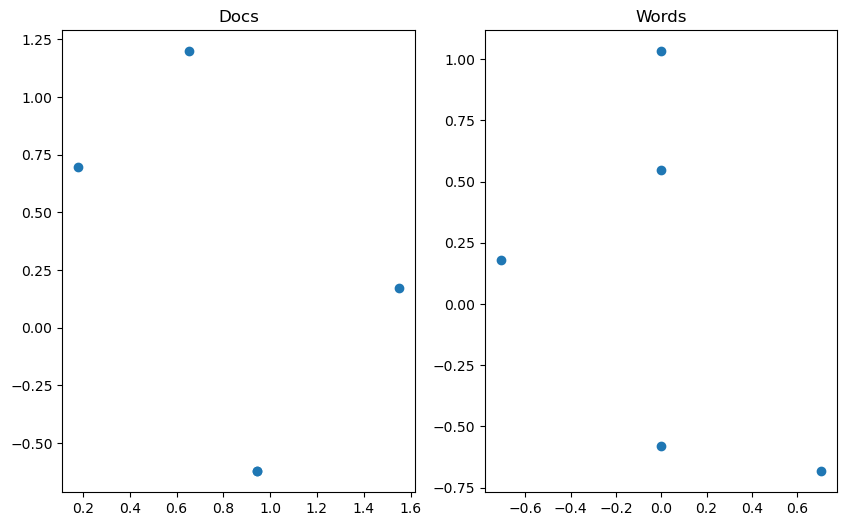

In [207]:
from matplotlib import pyplot as plt

(fig,(ax0,ax1)) = plt.subplots(1,2, figsize= (10,6))

ax0.set_title("Docs")
ax0.scatter(dtm2[:,0],dtm2[:,1])
ax1.set_title("Words")
ax1.scatter(tdm2[:,0],tdm2[:,1])

## State of the Union Task

1. Do a TruncatedSVD reduction of the State of the Union data set, which consists of all the state of the union addresses of U.S. presidents since the practice began (1945?  Harry S. Truman).  Construct a reducer designed to reduce the term document matrix to to 200 dimensions.  What number of dimensions does the model actually reduce to for our data?  Why?
2. Find the document ranking for the two-word query "evil empire".
3. Compute NQ, the set of documents that contain neither of the two query words.  Find the highest ranking document within NQ. 
4. Compare the highest ranking document in NQ with the next highest ranking document not in NQ.  Does their ranking reflect their relevance?
5. What is the minimum value that the scikit learn implementation of cosine can take?  What is the minimum value of the cosine simlarity scores in our data?  If they differ by more than 1e-8, is that a property of our data or the SVD computation or the scikit learn implementation of cosine?  Why?  If you have no idea why, make an educated guess and explain what lies behind your guess.
6. Find the two most similar documents (speeches), using cosine as you similarity measure, and using the reduced representation of the docments.

In [313]:
from nltk.corpus import state_union
from sklearn.feature_extraction.text import TfidfVectorizer

In [312]:
fid0 =state_union.fileids()[0]
docs = []
for fid in state_union.fileids():
    with state_union.open(fid) as fh:
        docs.append(fh.read())

In [334]:
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import TreebankWordTokenizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Slip a stemmer into the tokenizer

def my_tokenizer (doc,stemmer=stemmer,tknzr=tb_tknzr):
    return [stemmer.stem(wd) for wd in tknzr.tokenize(doc)]


stemmer = nltk.PorterStemmer()
#stops = list(stopwords.words("english"))#
stops = [stemmer.stem(st) for st in stopwords.words("english")]
tb_tknzr = TreebankWordTokenizer()
puncts = list(":,.?!\'")
cv = TfidfVectorizer(stop_words=stops+puncts,tokenizer=my_tokenizer,min_df=2,token_pattern=None)